# CS535/EE514 Machine Learning - Spring 2024 - Assignment 4

# Logistic Regression and Linear Discriminant Analysis

**Date Assigned**: Monday, March 18, 2024

**Date Due**: Wednesday, March 27, 2024 (11:55 pm)

**Important Notes**

1.   The assignment integrates tasks spanning methods as well as principles. Some tasks will involve implementation (in Python) and some may require mathematical analysis.  
2.   All cells must be run once before submission and should be displaying the results(graphs/plots etc). Failure to do so will result in deduction of points.
3.   While discussions with your peers is strongly encouraged, please keep in mind that the assignment is to be attempted on an individual level. Any plagiarism (from your peers) will be referred to the DC without hestitation.
4. For tasks requiring mathematical analysis, students familiar with latex may type their solutions directly in the appropriate cells of this notebook. Alternatively, they may submit a hand-written solution as well.
5. Use procedural programming style and comment your code properly.
5. Upload your solutions as a zip folder with name `RollNumber_A4` on the Assignment tab and submit your hand-written solutions in the drop-box next to the instructor's office.
5. **Policy on Usage of Generative AI Tools**. Students are most welcome to use generative AI tools as partners in their learning journey. However, it should be kept in mind that these tools cannot be blindly trusted for the tasks in this assignment (hopefully) and therefore it is important for students to rely on their own real intelligence (pun intended) before finalizing their solution/code. It is also mandatory for students to write a statement on how exactly have they used any AI tool in completing this assignment.
5. **Vivas** The teaching staff reserves the right to conduct a viva for any student.   
5. **Policy on Late Submission**. Late solutions will be accepted with a 15% penalty per day till Friday, March 29, 2024 (11:55 pm) . No submissions will be accepted after that.      




The following packages are required for this assignment. If you are running notebook on your PC, open a terminal/command prompt window in the assignment folder and run the following command:

`pip install -r requirements.txt`

If you are working on Google Colab, you do not need this.

In [14]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#### **Task 1: Multi-class LDA Decision Region Boundary**

Consider a two-dimensional three-class LDA problem. For some training data, let the estimated parameters be given as
\begin{align*}
\textbf{Mean Vectors: }& \mu_0 = [1, \:\: 1]^T \\
&\mu_1 = [5, \:\: 1]^T \\
&\mu_2 = [1, \:\: 5]^T \\
&\\
\textbf{Covariance Matrices: }& \Sigma_0 = \Sigma_1 = \Sigma_2 = \left[\begin{array}{cc}1& 0\\ 0& 0.5 \end{array} \right] \\
&\\
\textbf{Class Priors: }&  \pi_0=\pi_1 = \frac{1}{2 + e^2} \\
&\pi_2 = e^{-2} \pi_1
\end{align*}
Let $\mathcal{X}_0$ be the two-dimensional decision region for class-9, i.e., the prediction result is $Y=0$ whenever $\mathbf{x} \in \mathcal{X}_0$. Sketch $\mathcal{X}_0$ for the parameters given above. Clearly label all boundary points/lines of the region in relation to $\mu_0$, $\mu_1$ and $\mu_2$.

![working](task1_1.jpg)
![working](task1_2.jpg)


### **Logistic Regression**

As you have seen in class, the objective of logistic regression is to find a decision boundary between two or more distinct classes. We will focus on binary classification here. Given some data features $\mathbf{x} \in \mathbb{R}^{n+1}$ (with a 1 for the intercept term in the first position) for some $y \in \{0, 1\}$, we are essentially trying to learn a vector $\mathbf{w} \in \mathbb{R}^{n+1}$ such that:

\begin{align*}
z &= \mathbf{w}^{T}\mathbf{x} \\
\sigma(z) &= \frac{1}{1+e^{-z}} \\
\end{align*}

And $\sigma(z) = 1$ when $y = 1$ and $\sigma(z) = 0$ when $y = 0$.

To find the $\mathbf{w}$, we are going to optimize the binary cross-entropy loss function with L2 regularization:
\begin{align*}
\mathcal{L} = -\frac{1}{N}\sum_{i=1}^{N}y_{i}\log{(\sigma(\mathbf{w}^{T}\mathbf{x}_{i}))} + (1 - y_{i})\log{(1 - \sigma(\mathbf{w}^{T}\mathbf{x}))} + \lambda ||\mathbf{w}||_{2}^{2}
\end{align*}

You may read more about this from the resources section of the notebook.




#### **Task 2: Gradient of Cross-Entropy Loss Function**

Since the minimizer of the cross-entropy loss above has has no analytical solution, it must be optimized via gradient descent. From your class notes. Show that the gradient of the loss function is given as

\begin{align*}
\frac{\partial{\mathcal{L}}}{\partial{\mathbf{w}}} &= \frac{1}{N}\sum_{i=1}^{N}(\sigma(\mathbf{w}^{T}\mathbf{x}_{i}) - y_{i})\mathbf{x}_{i} + 2\lambda \mathbf{w}
\end{align*}

Note that this gradient is needed for the gradient descent algorithm.

![working](task2.jpg)

#### **Task 3: Connection between NBC with Poisson Features and Logistic Regression**

We proved in class how the posterior probability corresponding to the LDA generative model is of the logistic form. In this problem, we will show the same result for a generative NBC with Poisson features.

Consider a two-class naive Bayesian classifier with discrete features that are modeled as independent Poisson random variables. In particular, for a given class $Y=c$, $c=0,1$, the pmf of feature-$j$ ($j=1,\ldots,D$) is modeled as
\begin{align*} 
P\left(X_j = k|Y=c\right) = \frac{e^{\lambda_{j|c}} \lambda_{j|c}^k}{k!} \:\:\:\: k = 0,1,\ldots 
\end{align*}
    
Once again, under the naive assumption, the features are assumed to be independent of each other. Let the class prior be $\pi \triangleq P(Y=0)$.

Assuming that the parameters $\lambda_{j|c}$ and $\pi$ are known, show that for a feature vector $\mathbf{x}$, the class posterior turns out to be of the same form as that used in logistic regression, i.e., show that

$$ P\left(Y = 0 | \mathbf{x} \right) = \frac{1}{1 + e^{\beta^T \mathbf{x} + \gamma}}, $$

where $\beta$ is an $M \times 1$ vector and $\gamma$ is some scalar; both are functions of the known parameters $\lambda_{j|c}$ and $\pi$. Clearly specify $\beta$ and $\gamma$ as a function of the given parameters.


![working](task3_1.jpg)
![working](task3_2.jpg)

#### **Task 4: Logistic Regression Implementation**

1. You are to implement the following class for logistic regression and fit it to the sample data provided below. It is preferred that you **vectorize** all your operations. This may factor into the grading of this problem.

2. Feel free to modify the class as you see fit. Be mindful of documenting any functions you add.


3. Implement a manual function to compute the F1 score. Report the F1 score of your model's predictions on the test data using both your custom function and the function provided by the scikit-learn library.

4. Use the scikit-learn library to print the confusion matrix for your predictions.

A function has been provided to draw an approximate decision boundary, use it to debug your model. (The function may or may not work depending on your implementation. Feel free to modify it to suit your model. This will probably entail changing some array dimensions within the function).

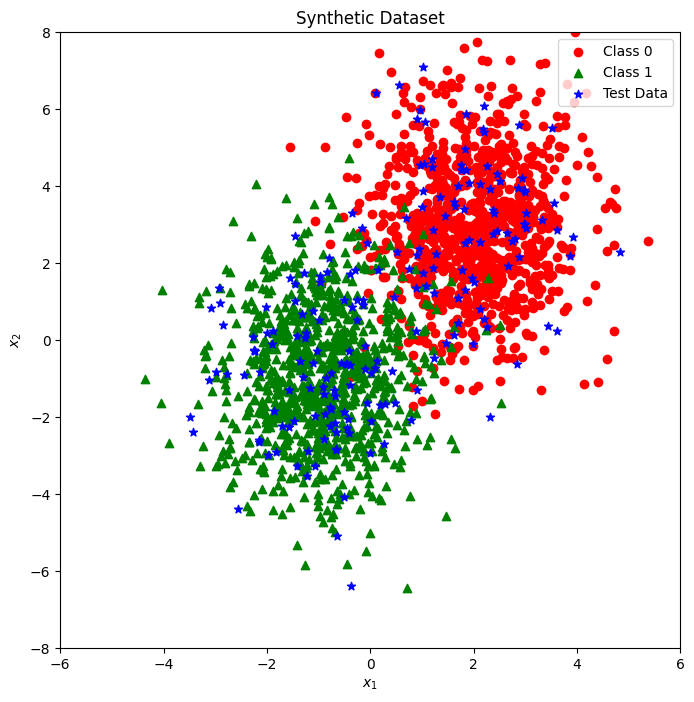

In [15]:
# Syntethic Data
random_seed = 45

mean_0 = [2, 3]
cov_0 = [
    [1, 0],
    [0, 3]
]

mean_1 = [-1, -1]
cov_1 = [
    [1, 0],
    [0, 3]
]

generator = np.random.default_rng(random_seed)
num_samples = 1000
train_size = 0.9

x10, x20 = generator.multivariate_normal(mean_0, cov_0, num_samples).T
x11, x21 = generator.multivariate_normal(mean_1, cov_1, num_samples).T


x1 = np.hstack((x10, x11)).reshape((-1, 1))
x2 = np.hstack((x20, x21)).reshape((-1, 1))
X = np.hstack((x1, x2))
y = np.concatenate([np.zeros((num_samples)), np.ones((num_samples))])


X, y = shuffle(X, y, random_state=random_seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)

fig = plt.figure(figsize=(8, 8))
ax = fig.subplots()

markers = ["o", "^"]
colors = ["red", "green"]
for i in range(2):
    _ = ax.scatter(X_train[y_train==i, 0], X_train[y_train==i, 1], marker=markers[i], color=colors[i], label=f"Class {i}")

_ = ax.scatter(X_test[:, 0], X_test[:, 1], marker="*", color="blue", label="Test Data")


_ = ax.set_xlabel(r"$x_{1}$")
_ = ax.set_ylabel(r"$x_{2}$")
_ = ax.set_xlim([-6, 6])
_ = ax.set_ylim([-8, 8])
_ = ax.set_title("Synthetic Dataset")
_ = ax.legend(loc="upper right")

In [16]:
def draw_decision_boundary(X, y, model, linear=True, degree=2, lambd = 0):
    """
    Draws (approximately) a decision boundary learnt by your function

    Arguments:
        X (numpy.ndarray)                                                      : Training features
        y (numpy.ndarray)                                                      : Training class labels
        model ([LogisticRegressionM, sklearn.linear_model.LogisticRegression]) : Model fitted on training data
        linear (bool)                                                          : Assumes features are of the form [1, x1, x2, x1^2, x1x2, x2^2, ...] if True and plots a non linear decision boundary
        degree (int)                                                           : Degree of underlying model

    Returns:
        None
    """
    if linear:
        feature_1, feature_2 = np.meshgrid(
            np.linspace(X[:, 0].min(), X[:, 0].max()),
            np.linspace(X[:, 1].min(), X[:, 1].max())
        )
        grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
        y_pred = np.reshape(model.predict(grid), feature_1.shape)
        display = DecisionBoundaryDisplay(
            xx0=feature_1, xx1=feature_2, response=y_pred
        )
        display.plot()
        display.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="black")
        plt.show()

    else:
        h = 0.02
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                                np.arange(y_min, y_max, h))
        polyfeatures = PolynomialFeatures(degree=degree)

        # added this myself to fit my model based on the X_train data to get the appropriate dimensions of the weight
        X_poly = polyfeatures.fit_transform(X)
        model.fit(X_poly, y)

        Z = model.predict(polyfeatures.fit_transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap="Spectral", alpha=0.6)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Spectral")
        plt.xlabel(r"$x_{1}$")
        plt.ylabel(r"$x_{2}$")
        plt.title('Non-linear Decision Boundary (Degree {}) (Lambda {})'.format(degree, lambd))

        plt.show()


In [17]:
class LogisticRegressionM:
    """
    Class for binary logistic regression
    """
    def __init__(self, lambd=0):
        """
        Class initializer
        Arguments:
            lambd (float)   : L2 regularization parameter

        """
        self.lambd = lambd
        self.w = None
        self.scaler = MinMaxScaler()

    def _sigmoid(self, z):
        """
        Implementation of the sigmoid function
        Arguments:
            z (numpy.ndarray)   : Array of arguments for the sigmoid function

        Returns:
            s (numpy.ndarray)   : Array of sigmoid activations
        """
        s = 1/(1 + np.exp(-z))
        return s

    def fit(self, X, y):
        """
        Fits w to minimize the
        Arguments:
            X (numpy.ndarray)          : Set of features for each training sample
            y (numpy.ndarray)          : True class of each training sample (0 or 1)

        Returns:
            self (LogisticRegressionM) : Fitted estimator
        """
        # Scaling the data
        X_scaled = self.scaler.fit_transform(X)

        # Getting the shape of X -> (data_points x num_features). initializing and empty array for weights
        data_points, num_features = X_scaled.shape
        self.w = np.zeros((num_features, 1))

        # Running gradient descent to get an optimized fitted estimator
        def computeCostGradient(X, y):
            z = X @ self.w
            h = self._sigmoid(z + self.lambd)

            y = y.reshape(y.shape[0], 1)
            cost_gradient = X.T @ (h - y)

            return cost_gradient

        num_iterations = 100
        learning_rate = 0.1
        for _ in range(num_iterations):
            self.w -= learning_rate * computeCostGradient(X_scaled, y)

        return self.w

    def predict(self, X):
        """
        Predict classes for the test data provided
        Arguments:
            X (numpy.ndarray)   : Set of features for testing samples

        Returns
            y (numpy.ndarray)   : Predicted class labels
        """
        # Scaling the data
        X_scaled = self.scaler.transform(X)
        
        z = X_scaled @ self.w
        y_pred_prob = self._sigmoid(z)
        y_pred = (y_pred_prob > 0.5).astype(int)
        return y_pred

#### Defining custom F1 score

In [18]:
# creating a custom function to calculate f1 score
def custom_f1_score(y_true, y_pred):
    """
    Manually compute F1 score
    Arguments:
        y_true (numpy.ndarray)  : True Labels
        y_pred (numpy.ndarray)  : predicted Labels

    Returns:
        f1_score (float)    : Computed F1 Score
    """

    # Calculating the terms for the confustion matrix
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TN = np.sum((y_true == 0) & (y_pred == 0))

    # calcualting Recall
    recall = TP / (TP + FN) if TP + FN != 0 else 0

    # calculating precision
    precision = TP / (TP + FP) if TP + FP != 0 else 0

    # calculating F1 score
    f1_score =  (2 * recall * precision) / (recall + precision) if recall + precision != 0 else 0

    return f1_score

#### finding best lambda for a given degree to maximize f1 score

In [19]:
# from sklearn.metrics import accuracy_score

# degree = 10
# start_lambda = 0.0
# max_lambda = 19.8
# step_lambda = 0.2

# max_accuracy = 0
# optimal_f1_score = 0.0
# optimal_deg = 0
# optimal_lambda = 0
# lamda_list = np.linspace(start_lambda, max_lambda, num=100)

# # Synthetic Data
# num_samples = 1000
# points = generator.uniform(low=-15, high=15, size=(num_samples, 2))

# X0 = points[points[:, 0]**2 + points[:, 1]**2 <= 11**2]
# X1 = points[points[:, 0]**2 + points[:, 1]**2 > 11**2]

# X0 += 1.5*generator.standard_normal(size=X0.shape)
# X1 += 1.5*generator.standard_normal(size=X1.shape)

# y0 = np.zeros((X0.shape[0]))
# y1 = np.ones((X1.shape[0]))


# X = np.concatenate([X0, X1], axis=0)
# y = np.concatenate([y0, y1])

# X, y = shuffle(X, y, random_state=random_seed)

# train_size=0.9
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)

# for deg in range(2, degree):
#     for lambdah in lamda_list:
#         # --- Implementation
#         X_train = np.array(X_train)
#         X_test = np.array(X_test)
#         y_train = np.array(y_train)
#         y_test = np.array(y_test)

#         # Training
#         model = LogisticRegressionM(lambd=lambdah)

#         # Fitting training vectors into the model
#         model.fit(X_train, y_train)

#         # Predicting the labels
#         y_pred = model.predict(X_test)

#         accuracy = accuracy_score(y_test, y_pred)
#         sklearn_f1_score = f1_score(y_true=y_test, y_pred=y_pred)

#         if optimal_f1_score < sklearn_f1_score:
#             max_accuracy = accuracy
#             optimal_f1_score = sklearn_f1_score
#             optimal_deg = deg
#             optimal_lambda = lambdah

#             print('\naccuracy:', max_accuracy, 'F1:', optimal_f1_score, 'degree:', optimal_deg, 'lambda:', optimal_lambda)


#### **Task 5: Logistic Regression with Nonlinear Boundaries**

The following synthetic dataset is now provided. Use your implemented class to learn a non-linear decision boundary. Draw the decision boundary using the function provided.

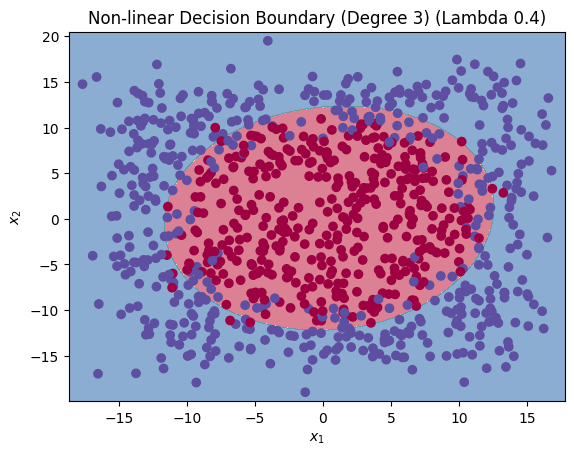

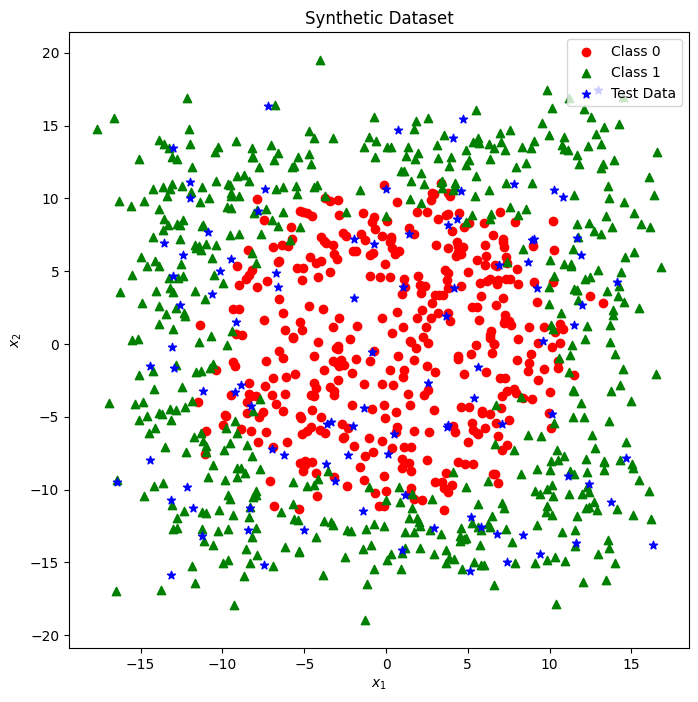

In [20]:
# Synthetic Data
num_samples = 1000
points = generator.uniform(low=-15, high=15, size=(num_samples, 2))

X0 = points[points[:, 0]**2 + points[:, 1]**2 <= 11**2]
X1 = points[points[:, 0]**2 + points[:, 1]**2 > 11**2]

X0 += 1.5*generator.standard_normal(size=X0.shape)
X1 += 1.5*generator.standard_normal(size=X1.shape)

y0 = np.zeros((X0.shape[0]))
y1 = np.ones((X1.shape[0]))


X = np.concatenate([X0, X1], axis=0)
y = np.concatenate([y0, y1])

X, y = shuffle(X, y, random_state=random_seed)

train_size=0.9
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)

# --- Implementation
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Training
lambdah = 0.4
model = LogisticRegressionM(lambd=lambdah)

# Fitting training vectors into the model
model.fit(X_train, y_train)

# Predicting the labels
y_pred = model.predict(X_test)

# Drawing the decision boundary
draw_decision_boundary(X_train, y_train, model, False, degree=3, lambd=lambdah)
fig = plt.figure(figsize=(8, 8))
ax = fig.subplots()

markers = ["o", "^"]
colors = ["red", "green"]
for i in range(2):
    _ = ax.scatter(X_train[y_train==i, 0], X_train[y_train==i, 1], marker=markers[i], color=colors[i], label=f"Class {i}")

_ = ax.scatter(X_test[:, 0], X_test[:, 1], marker="*", color="blue", label="Test Data")

_ = ax.set_xlabel(r"$x_{1}$")
_ = ax.set_ylabel(r"$x_{2}$")
_ = ax.set_title("Synthetic Dataset")
_ = ax.legend(loc="upper right")

#### Evaluting predictions on test data using custom and pre-made functions


In [21]:
# custom f1 score and confusion matrix
custom_f1_score = custom_f1_score(y_true=y_test, y_pred=y_pred)
print("F1 Score (custom):", custom_f1_score)

# sklearn f1 score and confusion matrix
sklearn_f1_score = f1_score(y_true=y_test, y_pred=y_pred)
print("F1 Score (scikit-learn):", sklearn_f1_score)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("\nConfusion matrix:\n", conf_matrix)

F1 Score (custom): 0.7804878048780487
F1 Score (scikit-learn): 0.7804878048780488

Confusion matrix:
 [[ 0 36]
 [ 0 64]]


#### **Task 6: Mini Project**

The following dataset contains rainfall prediction data for different areas under different conditions in Australia. The variable `RainTomorrow` is a binary variable representing whether it rained the other day or not. Your job is to train a classifier to predict this variable for the test dataset given below.

Feel free to use any technique you have learnt in the class. Report your model's F1 score on the test data. Whoever's model gives the best performance will be entitled to a reward (the nature of this reward is yet to be decided but it may very well be in terms of bonus marks).

In [22]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [23]:
X = df[
    ["MinTemp", "MaxTemp", "Rainfall", "Evaporation",
    "Sunshine", "WindGustSpeed", "Humidity9am", "Humidity3pm",
    "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm",
    "Temp9am", "Temp3pm", "RainTomorrow"]
    ]
X = X.dropna()
y = X["RainTomorrow"].map({"No": 0, "Yes": 1})
X = X.drop(columns=["RainTomorrow"])

polyfeatures = PolynomialFeatures(degree=2)
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=random_seed)


In [24]:
# Implementing logitic regression
lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

f_one_score = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("F1 Score:", f_one_score)
print(report)
print('Confusion Matrix:\n', conf_matrix)

F1 Score: 0.6114272706578647
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      9061
           1       0.74      0.52      0.61      2566

    accuracy                           0.85     11627
   macro avg       0.81      0.73      0.76     11627
weighted avg       0.84      0.85      0.84     11627

Confusion Matrix:
 [[8577  484]
 [1223 1343]]


## Student Statement on Usage of Generative AI Tools

Students MUST write a statement in this cell detailing their usage of any generative AI tools. If no such tool was used, write "*I have not used any generative AI tool for completing this assignment*".

In case such tools were used (and you are allowed to), the statement should read "*I have used generative AI tools for completing this assignment for Tasks (list the tasks) as per the following details*:". This should be followed by the following information:

1. What tools were used?
2. How exactly were they used?

## Resources

- A detailed [breakdown](https://towardsdatascience.com/where-did-the-binary-cross-entropy-loss-function-come-from-ac3de349a715) of the binary cross entropy loss function